In [4]:
import os, sys

In [5]:
sys.path.append('/mnt/turbo/eneswork/momi_jt/momi3/')

In [30]:
import demes, demesdraw, sparse
import matplotlib.pyplot as plt
import numpy as np

from momi3.Params import Params
from momi3.MOMI import Momi

# Load

<AxesSubplot:ylabel='time ago (generations)'>

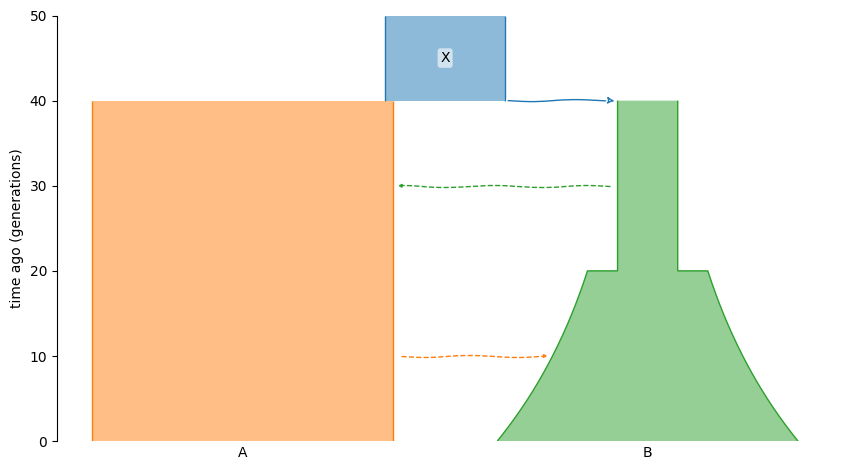

In [18]:
# Load demes graph
demo = demes.load(f"TwoDemes/TwoDemes.yml")
demesdraw.tubes(demo)

In [19]:
sampled_demes = ["A", "B"]
sample_sizes = [10, 16]

In [20]:
# Construct momi
momi = Momi(demo, sampled_demes=sampled_demes, sample_sizes=sample_sizes, jitted=True)

In [21]:
sfs_spec_momi = momi.sfs_spectrum()

In [22]:
sfs_spec_momi /= sfs_spec_momi.sum()

In [26]:
jsfs = sparse.load_npz("TwoDemes/TwoDemes.npz")

/tmp/ipykernel_3379640/2959819326.py:2: RuntimeWarning: divide by zero encountered in log
  ax1.imshow(np.log(sfs_spec_momi))
/tmp/ipykernel_3379640/2959819326.py:3: RuntimeWarning: divide by zero encountered in log
  ax2.imshow(np.log(jsfs.todense()))


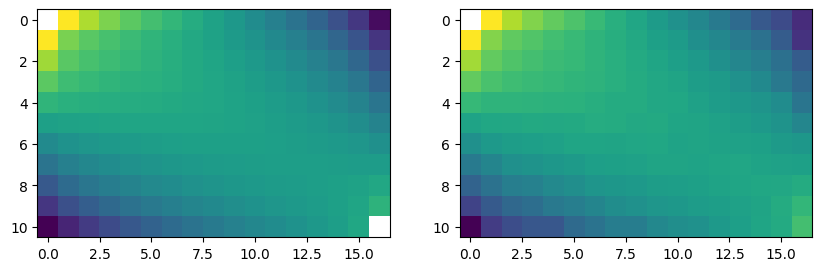

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 5))
ax1.imshow(np.log(sfs_spec_momi))
ax2.imshow(np.log(jsfs.todense()))

In [43]:
params = Params(momi)

In [44]:
# Set the parameters you want to infer
params.set_train("eta_3", True)
params.set_train("eta_1", True)
params.set_train("pi_0", True)
params.set_train("tau_4", True)

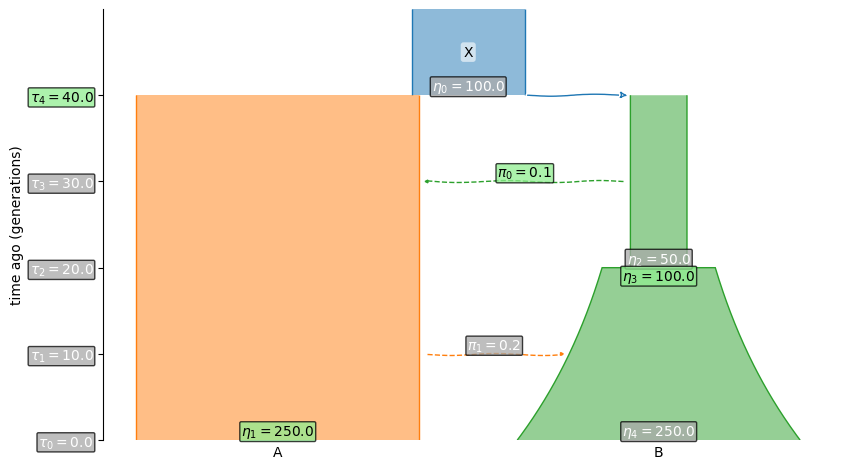

In [46]:
params.tubes(show_letters=True)

### Write a function to get the maximum likelihood given a fixed value of "pi_1"

In [ ]:
def MLE_given_pi_1(val_pi_1):
    # TODO 